## Imports and data read-in

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import NearestNeighbors

# Graphs and other visualizations
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

column_names = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
               'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 
               'User_Count', 'Developer', 'Rating']
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', sep=',', names=column_names)

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Up Data

In [3]:
df.drop(['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'], axis=1, inplace=True)

### Drops Non-existent Data from Data

In [4]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
df.drop(659, inplace=True)

df.drop(14246, inplace=True)

In [6]:
# Removes columns with counts less than 350.
less_platform = ['2600', '3DO', 'DC', 'GB', 'GEN', 'GG', 'N64','NES', 'NG',
                          'PCFX', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'WiiU', 'XOne']

df = df[~df['Platform'].isin(less_platform)]

In [7]:
df = df[df['Genre'] != 'Misc']

In [8]:
# Drops any null referenced Publishers entries from the data.
for index in df[df['Publisher'].isna()].index:
    df.drop(index, inplace=True)

# Drops any Unkown Publishers entries from the data.
for index in df[df['Publisher'] == 'Unknown'].index:
  df.drop(index, inplace=True)

# Drops any null referenced Year_of_Release entries from the data.
for index in df[df['Year_of_Release'].isna()].index:
  df.drop(index, inplace=True)

In [9]:
# Sets the Year_of_Release datatype to be a string.
df['Year_of_Release'] = df['Year_of_Release'].astype('str')

In [10]:
# Drops any null referenced User_Score entries from the data.
for index in df[df['User_Score'].isna()].index:
  df.drop(index, inplace=True)

# Drops any null referenced Developer entries from the data.
for index in df[df['Developer'].isna()].index:
  df.drop(index, inplace=True)

# Drops any null referenced Rating entries from the data.
for index in df[df['Rating'].isna()].index:
  df.drop(index, inplace=True)

In [11]:
# Sets the User_Score datatype to be a float.
df['User_Score'] = df['User_Score'].astype('float')

In [12]:
# Drops the Developer column from the main dataframe so it can be used elsewhere.
df.drop('Developer', axis=1, inplace=True)

In [13]:
# The results of the data after the cleaning process.
df = df.reset_index(drop=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,8.0,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,8.0,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,8.5,E
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,8.4,E
...,...,...,...,...,...,...,...,...,...,...,...
6657,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,2.4,E
6658,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,8.8,M
6659,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,8.1,K-A
6660,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,7.6,M


## Heatmap of Cleaned Data

<AxesSubplot:title={'center':'Heatmap of the Video Game Dataset'}>

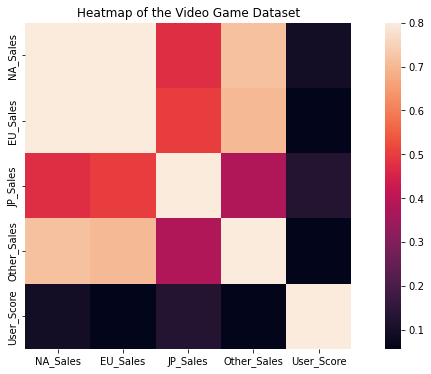

In [14]:
corr_mat = df.corr()
plot.figure(figsize=(12,6))
plot.title("Heatmap of the Video Game Dataset")
sns.heatmap(corr_mat, vmax=.8, square=True)

## Save Game Name to New DataFrame for Future Use

In [15]:
# Save game names on new dataframe
df_game_name = pd.DataFrame({'Game': df['Name']}).reset_index(drop=True)
df_game_name.head()

,Game
0,Wii Sports
1,Mario Kart Wii
2,Wii Sports Resort
3,New Super Mario Bros.
4,New Super Mario Bros. Wii


## Index Replacement

In [16]:
# Use name column as index
df.set_index('Name', inplace=True)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Rating
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,8.0,E
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,8.3,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,8.0,E
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,8.5,E
New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,8.4,E


In [17]:
# Select all columns with datatype object
column_object_df = df.dtypes[df.dtypes == 'object'].keys()
column_object_df

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Rating'], dtype='object')

In [18]:
# Convert category data to dummy/indicator values.
dummy_indicator_label = pd.get_dummies(df[column_object_df])
dummy_indicator_label.head(3)

,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Publisher_id Software,Publisher_inXile Entertainment,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Removal of Object Data Type

In [19]:
# delete column with data type object
df.drop(column_object_df,axis=1,inplace=True)
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score
Name,,,,,
Wii Sports,41.36,28.96,3.77,8.45,8.0
Mario Kart Wii,15.68,12.76,3.79,3.29,8.3
Wii Sports Resort,15.61,10.93,3.28,2.95,8.0
New Super Mario Bros.,11.28,9.14,6.50,2.88,8.5
New Super Mario Bros. Wii,14.44,6.94,4.70,2.24,8.4


In [20]:
# Concat dummy/indicator data with whole data
df = pd.concat([df,dummy_indicator_label],axis=1)
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Publisher_id Software,Publisher_inXile Entertainment,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,41.36,28.96,3.77,8.45,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,15.68,12.76,3.79,3.29,8.3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,15.61,10.93,3.28,2.95,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros.,11.28,9.14,6.50,2.88,8.5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros. Wii,14.44,6.94,4.70,2.24,8.4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
# Save all numeric column data to a list.
column_numeric = list(df.dtypes[df.dtypes == 'float64'].keys())
column_numeric

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'User_Score']

## MinMaxScaler Initialization

In [22]:
# MinMaxScaler initiation
scaler = MinMaxScaler()

In [23]:
# Numerical column data standardization
scaled = scaler.fit_transform(df[column_numeric])

In [24]:
# Scaled the data
i=0
for column in column_numeric:
    df[column] = scaled[:,i]
    i += 1

In [25]:
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,User_Score,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Publisher_id Software,Publisher_inXile Entertainment,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,1.000000,1.000000,0.580000,0.799432,0.824742,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Mario Kart Wii,0.379110,0.440608,0.583077,0.311258,0.855670,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Wii Sports Resort,0.377418,0.377417,0.504615,0.279092,0.824742,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros.,0.272727,0.315608,1.000000,0.272469,0.876289,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
New Super Mario Bros. Wii,0.349130,0.239641,0.723077,0.211921,0.865979,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## K-NearestNeighbor Setup

In [26]:
# Model initiation
model = NearestNeighbors(metric='euclidean')

# Fit model to the data
model.fit(df)

NearestNeighbors(metric='euclidean')

In [27]:
# Create function to get the game recommendation
def GameRecommended(gamename:str, recommended_games:int=5):
    if gamename in df.index:
        print(f'{recommended_games} game similar to {gamename}:')
        # Looking for the game with the highest similarity to the game that user play. Note we grab one more game since we
        # are going to drop the first game, which is the game passed in.
        distances, neighbors = model.kneighbors(df.loc[gamename],n_neighbors=recommended_games + 1)
        # Input the recommended game into the list
        similar_game = []
        for gamename in df_game_name.loc[neighbors[0][:]].values:
            similar_game.append(gamename[0])
        # Input the distance score into the list
        similar_distance = []
        for distance in distances[0]:
            similar_distance.append(f"{round(100-distance, 2)}%")
        # Return a dataframe with the most recommended game
        return pd.DataFrame(data = {"Game" : similar_game[1:], "Similarity" : similar_distance[1:]})
    else:
        return f'Could not find {gamename} in current list of games'

In [28]:
# Give the recommendation to the selected game
GameRecommended("Destiny")

5 game similar to Destiny:


,Game,Similarity
0,Call of Duty: Advanced Warfare,98.58%
1,Overwatch,98.58%
2,Destiny: The Taken King,98.58%
3,Cabela's Big Game Hunter: Pro Hunts,98.58%
4,Destiny,98.58%


## Front-End Code

In [29]:
import ipywidgets as widgets
from IPython.display import display

game_input = widgets.Text(
    description="Game Name:",
    disabled=False
)
style = {'description_width': 'initial'}
num_of_games = widgets.Text(
    description="Number of Recommended Games:",
    disabled=False,
    value="5",
    style=style
)
submit_button=widgets.Button(description='Submit',button_style='success')
game_list = widgets.Output()


def on_button_clicked(b):
    game_list.clear_output()
    with game_list:
        output_list = GameRecommended(game_input.value, int(num_of_games.value)) 
        display(output_list)


submit_button.on_click(on_button_clicked)
display(widgets.TwoByTwoLayout(top_left=game_input,
               bottom_left=num_of_games,
               bottom_right=submit_button ), game_list)

TwoByTwoLayout(children=(Text(value='', description='Game Name:', layout=Layout(grid_area='top-left')), Text(v…

Output()